## Linear Regression
## Zohair Mubasheer Ahmed
## 8897082
### Using Sci-kit Learn and Diabetes Dataset

### - Importing the required Packages

In [1]:
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


### - Loading the Diabetes Dataset

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_bmi = diabetes_X[0:,2].reshape((-1,1))
diabetes_bmi

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

### - The Shape of the dataset with Independent variable

In [3]:
diabetes_X.shape

(442, 10)

### - The values in the Independent variable Data

In [4]:
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

### - The Shape of the dataset with dependent variable

In [5]:
diabetes_y.shape

(442,)

### - The Values of the dataset with Independent variable

In [6]:
diabetes_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### - Visualizing the dataset and addiing the Atrribute names

In [7]:
dataset= pd.DataFrame(diabetes_X)
dataset.columns = ["Age", "Sex", "BMI", "ABP", "TCC", "LDL", "HDL", "TC", "STL", "BSL"]
dataset

,Age,Sex,BMI,ABP,TCC,LDL,HDL,TC,STL,BSL
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


### - Displaying the y component 

In [8]:
dependent = pd.DataFrame(diabetes_y)
dependent.columns = ["Disease_progression"]
dependent

,Disease_progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


### - Adding the Disease Progression attribute to the end of the dataset for visualization

In [9]:
diabetes_dataset = pd.concat([dataset, dependent], axis=1, join='inner')
diabetes_dataset

,Age,Sex,BMI,ABP,TCC,LDL,HDL,TC,STL,BSL,Disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### - The Scatter plot of the selected dependent and independent variable, BMI and Disease Progression

<Axes: xlabel='BMI', ylabel='Disease_progression'>

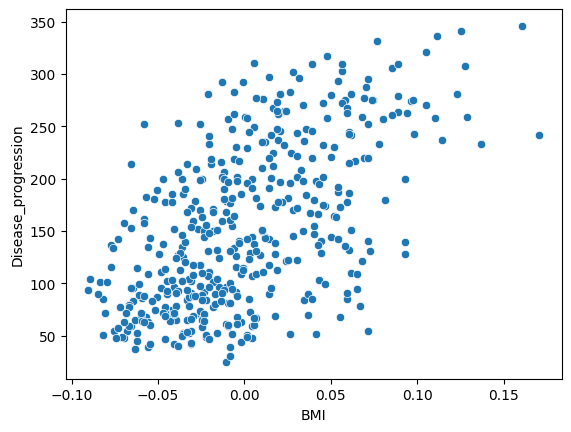

In [10]:
sbn.scatterplot(diabetes_dataset, x='BMI', y='Disease_progression')

### - Splitting the dataset into training and testing datsets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_bmi, diabetes_y, test_size=0.2, random_state=0)


# -Visualizing the Training Data

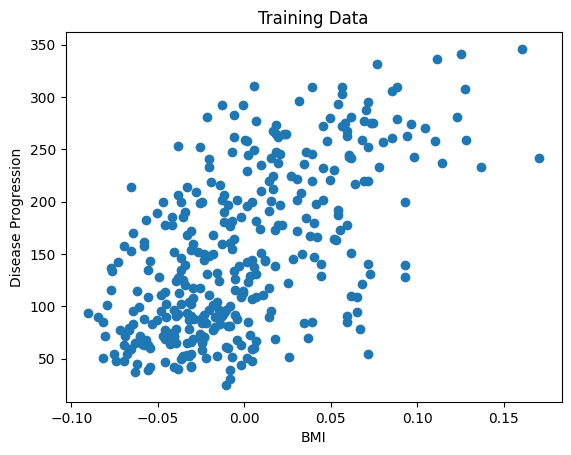

In [12]:
plt.scatter(X_train,y_train)
plt.title("Training Data")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.show()

# -Visualizing the Training Data

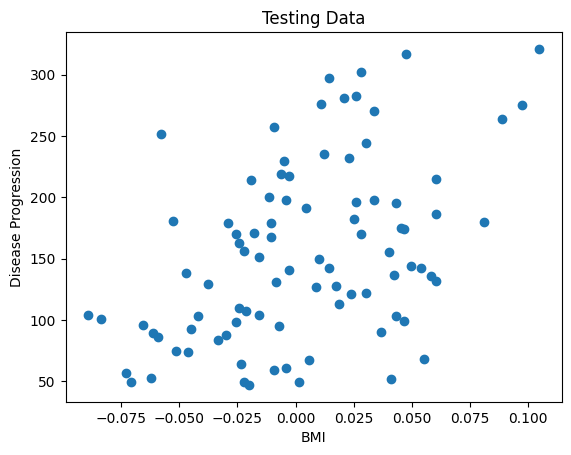

In [13]:
plt.scatter(X_test,y_test)
plt.title("Testing Data")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.show()

### - Utilizing the Sklearn approach for the Linear Regression thorugh in-built functions

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### - Prediction of the Dependent Variable through the initialized model

In [15]:
y_pred = model.predict(X_test)
y_pred_table = pd.DataFrame(y_pred)
y_pred_table.columns = ["Predicted Disease Progression Values"]
y_pred_table

,Predicted Disease Progression Values
0,255.174269
1,211.794626
2,161.008702
3,129.267499
4,196.982065
...,...
84,64.727054
85,82.713736
86,194.865984
87,166.298902


# - Regression Line

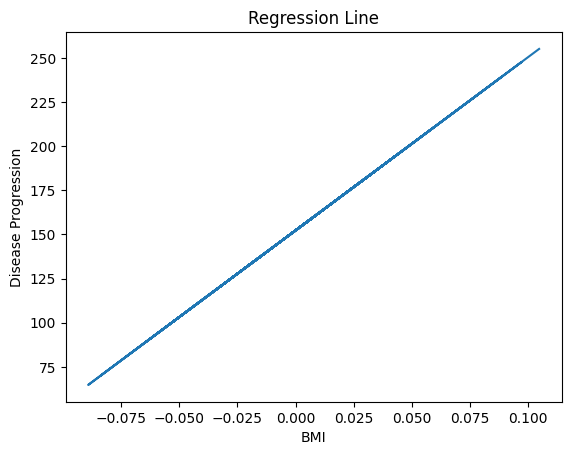

In [16]:
plt.plot(X_test,y_pred)
plt.title("Regression Line")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.show()

# - Regression Analysis Visialization

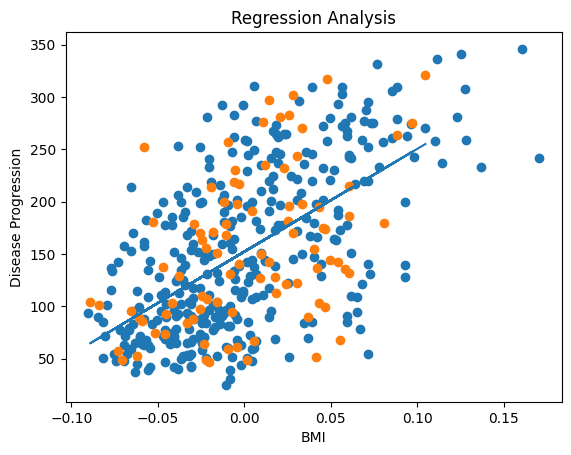

In [17]:
plt.title("Regression Analysis")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_test, y_pred, label="Regression Line")
plt.show()

### - Calculation of the Mean Square Error for the predicted Test values to determine the accuracy of the Linear Regression

In [18]:
mse = mean_squared_error(y_test,y_pred)
mse

4150.6801893299835

### - Calculation of the Mean Square Error for the predicted Train values to determine the accuracy of the Linear Regression

In [19]:
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train,y_pred_train)
mse

3827.8186984113813

## Takeaways from performing this univariate regression and the fit

The slope of the model denotes the extent of variation in the advancement of the disease with respect to each unit alteration in BMI. A positive correlation indicates that an elevated BMI is linked to a heightened likelihood of disease progression. The intercept variable denotes the approximated advancement of the ailment in the absence of any body mass index value. Nevertheless, within the framework of BMI, a zero intercept lacks significance as BMI cannot attain a value of zero in actuality. The evaluation of the model's performance on the test dataset serves as a measure of its ability to generalize to novel data. A reduced loss value is indicative of superior performance; however, our training and testing datasets exhibit a high loss.


In conclusion, the univariate linear regression model applied to the diabetes dataset yields a satisfactory fit, indicating that BMI could serve as a valuable predictor for the progression of the disease. Nevertheless, conducting a more in-depth examination and assessment of supplementary characteristics may furnish a more all-encompassing comprehension of the determinants that impact the advancement of illness in diabetes. By utilizing the remaining attributes, it is possible to enhance the training of our model and achieve favorable outcomes.
